## Rule
- Open everything. No communication regarding exam.
- You will be graded out of 450.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Problem 1: (100)
Some Theory. Make the correct statement **bold**

1. When we found that gradient descent does not converge. We should (increase/**decrease**) the learning rate.

2. Gradient descent (guarantee/ **does not guarantee**) global minimum.

3. Newton's Methods (guarantee/**does not guarantee**) convergence.

4. Monte Carlo integration convergence (does/**does not**) depend on the number of dimension.

5. Hill Climbing method (guarantee/ **does not guarantee**) global minimum.

## Problem 2:
    
### 2.1 (50)
Find solutions to the following system of equation using Newton's method.
$$
x + \sin(y) = 1 \\
y^2 + \sin(x) = 2
$$

Find both solutions. There are two.


In [2]:
def u(x, y):
    return x + np.sin(y) -1

def v(x,y):
    return y**2 + np.sin(x) -2

def u_x(x, y):
    return 1

def u_y(x, y):
    return np.cos(y)

def v_x(x, y):
    return np.cos(x)

def v_y(x,y):
    return 2*y

def newton_2D(initial, n):
    x_s, y_s = initial
    for i in range(n):
        alpha = np.array([-u(x_s, y_s), -v(x_s, y_s)])
        beta = np.array([[u_x(x_s, y_s), u_y(x_s, y_s)],
                        [v_x(x_s, y_s), v_y(x_s, y_s)]])
        x, y = np.linalg.solve(beta, alpha)
        x_s = x_s +x
        y_s = y_s +y
    
    return x_s, y_s

print("result 1:", newton_2D((0.,-2.), 20))
print("result 2:", newton_2D((0.,2.), 20))
    

result 1: (1.8518061190601822, -1.0194234220493739)
result 2: (0.012960145441816378, 1.4096241404588696)


### 2.2(50)
    
$$
\int_C \sin(x^2)\cos(y^2) \;\text{d}A
$$

where C is the region defined by **circle of radius 1 centered at $x=1, y=2$**

In [3]:
def f(x, y):
    return np.sin(x**2)*np.cos(y**2)

n = 100000
x = (np.random.rand(n)*2)
y = (np.random.rand(n)*2)+1

res = 0
for i in range(n):
    if (((x[i]-1)**2)+((y[i]-2)**2) <= (1**2)):
        res += f(x[i],y[i])
total_vol = (2**2)/n
res *= total_vol
print(res)



-0.1371362202761555


## Problem 3

We believe that the data be written as

$$y = A \exp(\frac{-(x-\mu)^2}{\sigma^2}) + Bx + C$$

Find $A, B, C, \mu$ and $\sigma$ which gives you the best fit.

Be careful with starting parameter.

In [4]:
p3_xs = np.array([-5.        , -4.79591837, -4.59183673, -4.3877551 , -4.18367347,
       -3.97959184, -3.7755102 , -3.57142857, -3.36734694, -3.16326531,
       -2.95918367, -2.75510204, -2.55102041, -2.34693878, -2.14285714,
       -1.93877551, -1.73469388, -1.53061224, -1.32653061, -1.12244898,
       -0.91836735, -0.71428571, -0.51020408, -0.30612245, -0.10204082,
        0.10204082,  0.30612245,  0.51020408,  0.71428571,  0.91836735,
        1.12244898,  1.32653061,  1.53061224,  1.73469388,  1.93877551,
        2.14285714,  2.34693878,  2.55102041,  2.75510204,  2.95918367,
        3.16326531,  3.36734694,  3.57142857,  3.7755102 ,  3.97959184,
        4.18367347,  4.3877551 ,  4.59183673,  4.79591837,  5.        ])
p3_ys = np.array([-3.68772107, -3.67941398, -3.1462531 , -2.95653641, -3.10147411,
       -2.91346186, -2.88410695, -2.71646963, -2.49963456, -2.50369043,
       -2.25090053, -2.56505422, -2.13260531, -2.27992346, -2.14562936,
       -2.12596261, -1.35278898, -1.71622788, -1.57028003, -1.65361591,
       -0.9234219 , -0.88144526, -0.77234316, -1.03093821, -0.54947754,
        0.50733427, -0.00471332,  0.4976489 ,  1.51112504,  1.7035049 ,
        2.06354253,  3.08385693,  2.51778002,  2.63658336,  3.18624835,
        2.54578237,  2.33866124,  2.31325498,  2.29221991,  1.59749764,
        1.83940422,  1.2050842 ,  1.20128484,  1.50524725,  1.34539803,
        0.98641652,  1.24856525,  1.15139335,  1.47977891,  1.4729804 ])

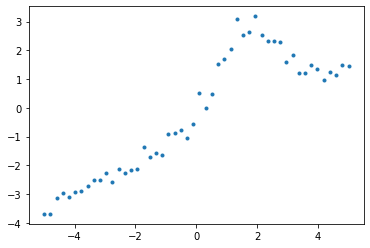

In [5]:
plt.plot(p3_xs, p3_ys, '.')

[ 2.97964504  0.49529678 -0.97113259  1.66142546  1.42026975]


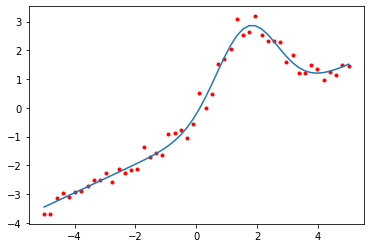

In [6]:
import scipy.optimize

def cost(v):
    A, B, C, u, s = v
    return np.sum(((A*np.exp(-(p3_xs-u)**2/(s**2))+B*p3_xs+C-p3_ys)**2))

res = scipy.optimize.minimize(cost,(1,1,1,1,1))
A, B, C, u, s = res.x
print(res.x)

plt.plot(p3_xs, p3_ys,'.r')
x_s = np.linspace(-5, 5)
plt.plot(x_s,(A*np.exp(-(x_s-u)**2/(s**2))+B*x_s+C))

## Problem 4: Simulation (100)

Consider a game where the player toss 5 dices at a time. Each turn his score is the maximum of the 5 dices. For example, if the 5 dices are [3,5,2,1,5] then his score is 5.

1) Find the probabality that his score is below or equal 3.

In [7]:
def dice():
    x = np.random.rand()
    if x < 1/6:
        return 1
    elif x < 2/6:
        return 2
    elif x < 0.5:
        return 3
    elif x < 4/6:
        return 4
    elif x < 5/6:
        return 5
    else:
        return 6
    
def score():
    tosses = []
    for i in range(5):
        tosses.append(dice())
    maxi = max(tosses)
    return maxi

def probability(x,n):
    count = 0
    for i in range(n):
        if score() <= x:
            count += 1
    
    return count/n

print(probability(3, 1000))

0.028


2) What is the expected value of his score?

In [8]:
def expected(n):
    value = 0
    for _ in range(n):
        value += score()
    return value/n

print(expected(10000))

5.4254


### Problem 5: Hill Climbing(100)

Food delivery service is now quite popular given social distancing adopted by many countries. Let's us try to solve lunch time problem for a Juni's Kitchen: a startup company delivering lunch to people.

Juni's Kitchen has a **centralized** kitchen where they cook all the food at **(0,0)**. The delivery motocycles need to pick up the food from this centralized location and travel to each customer house to deliver lunch.

**The company only have 6 motorcycle**. It is very economical that each motorcycle pick up **all** the lunch that each motorcycle needs to deliver. Then deliver them. This way the motorcycle doesn't have to waste gas coming back to the central location to pick up food.

Consider a lunch day where there are **60 deliveries to be made**. The job is spread out evenly so that each motorcycle needs to make **10 deliveries each**. The location of each delivery is given(xs, ys) list in the list below.

Since Juni company is a startup. They try very best to save on money. The cost of delivery is proportional to the total distance$\sqrt{\Delta x^2 + \Delta y^2}$ the motorcycles traveling
    
    - from the kitchen center to the first location
    - from delivery location to delivery location
    - from the final delivery location back to the kitchen center
    
Find and plot a path for the 6 motorcycles that save Juni's money. **I'm not looking for the global minimum just a decent path is enough**. (I accept anything below 300)

**Note**

If you have nothing better to do, in the real world application, spreading out the job to 10delivery/motorcycle is a not a very good constraint. The better contsraint would be to limit the delivery for each motorcycle to 20 delivery max/motorcycle(each motorcycle will get different amount of job)

[ -5.42815302   4.98672723   1.41489249  -7.53147357  -2.89300126
   8.25718269 -12.13339622  -2.14456314   6.32968129  -4.33370201
  -3.39443076  -0.47354484   7.45694813  -3.19450998  -2.2199098
  -2.17175638  11.02965041  10.93393044   5.02026949   1.930932
   3.68684288   7.45366014  -4.67916934   5.87914522  -6.26940334
  -3.18875751   4.53552598  -7.1434035   -0.7003436   -4.30877448
  -1.27809685 -13.99294553  -8.85766552  -3.49938617   4.63731216
  -0.86817841   0.01422958   3.44111356  -4.39768172   1.41813662
  -4.02683259  -8.63834747  -1.95449897   2.86902931   1.69294525
  -0.05915247  11.96182633   2.0645608    4.89368003  11.19071669
  -6.47042662  -5.19394105   8.71856113  -3.99031368   0.14841615
   5.34657985   4.45353196   8.77443091   7.47822069   5.34696335]


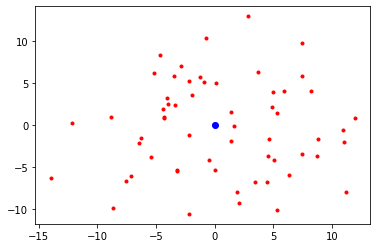

In [9]:
np.random.seed(123)
xs = np.random.randn(60)*5
ys = np.random.randn(60)*5
plt.plot(xs, ys, '.r') # These people are hungry
plt.plot(0,0, 'ob') # The kitchen center
print(xs)

global distance: 253.69359013412264


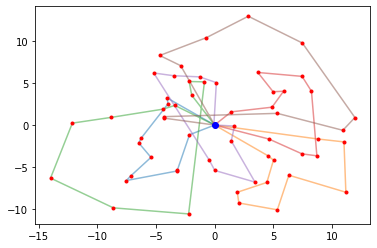

In [10]:
def distance(v1, v2):
    x1, y1 = v1
    x2, y2 = v2
    return np.sqrt((x1-x2)**2 + (y1-y2)**2)

def distance2(px, py):
    kitchen = (0,0)
    customer = 0
    dist = 0
    for entry in range(0, len(px)):
        if customer == 0:
            dist += distance(kitchen, (px[entry], py[entry]))
            customer += 1
        elif customer == 9:
            dist += distance(kitchen, (px[entry], py[entry]))
            dist += distance((px[(entry-1)], py[(entry-1)]), (px[entry], py[entry]))
            customer = 0
        else:
            dist += distance((px[(entry-1)], py[(entry-1)]), (px[entry], py[entry]))
            customer += 1
    return dist
        

def swap(px, py):
    newX = px.copy()
    newY = py.copy()
    
    ind1 = np.random.randint(len(px))
    ind2 = np.random.randint(len(px))
    
    tmp = newX[ind1]
    newX[ind1] = newX[ind2]
    newX[ind2] = tmp
    
    tmp = newY[ind1]
    newY[ind1] = newY[ind2]
    newY[ind2] = tmp

    return newX, newY

def evaluate(n):
    cy = ys
    cx = xs
    distance = distance2(xs, ys)
    for i in range(n):
        newX, newY = swap(cx, cy)
        if distance > distance2(newX, newY):
            distance = distance2(newX, newY)
            cy = newY
            cx = newX
            #print("archieve")
    return distance, cx, cy



final_dist, rX, rY = evaluate(10000)
print("global distance:", final_dist)


# X processing for plotting
routesX = list(np.split(rX, 6))
waysX = []
for route in routesX:
    route = list(route)
    route.insert(0,0)
    route.append(0)
    waysX.append(route)


# Y processing for plotting
routesY = list(np.split(rY, 6))
waysY = []
for route in routesY:
    route = list(route)
    route.insert(0,0)
    route.append(0)
    waysY.append(route)


for i in range(len(waysX)):
    plt.plot(waysX[i], waysY[i], alpha= 0.5)

np.random.seed(123)
xs = np.random.randn(60)*5
ys = np.random.randn(60)*5
plt.plot(xs, ys, '.r') # These people are hungry
plt.plot(0,0, 'ob') # The kitchen center
